In [85]:
# Checking out some 'books' from the libraries.
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

# Converting data into a dataframe structure 
X = pd.DataFrame(data['data'], columns=data['feature_names'])
# Setting up our Y value as well
y = pd.Series(data['target'])

In [2]:
# More Books!!
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

In [5]:
# Train test split for fun
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 5)


In [25]:
# Create our classifier and our bag
DT = DecisionTreeClassifier()
BC = BaggingClassifier(base_estimator = DT, n_estimators =5, max_features = 0.5, max_samples = 0.5)

# Fitting the Bag
BC.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=5, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [26]:
#  Getting our bags base model 
# We can only have one base model so our estimator models can not have varying parameters
# The Random_state is more or less a reference seed.
BC.base_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [27]:
# Gettin the rest of our bags models.
BC.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1873720024, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=584153195, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=2096301464, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None, min_samples_leaf

In [28]:
# Getting the features in each of our bagged models.
# Pretty much their index values of the list of feature names
BC.estimators_features_

[array([ 5, 29, 23, 10, 11, 17, 18,  3, 27, 12, 19, 22, 21, 15, 26]),
 array([16,  4,  0,  5, 12,  9,  3, 21, 22, 29,  7, 26,  1, 11, 10]),
 array([ 7, 16, 15,  5, 17, 20, 27, 28,  2, 22,  9, 19, 14,  0, 26]),
 array([17,  9,  7,  0, 24, 18,  5, 15, 20,  4, 28, 25, 13,  3,  1]),
 array([ 2, 18, 11, 16,  4, 25,  5, 22,  6,  7, 29, 21, 14, 28, 23])]

# Lets re-create on of our bagged models!!!!

In [35]:
# What are the parameters for the first decision tree in our bag?
BC.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1873720024, splitter='best')

In [36]:
# What are the features used in the first model
BC.estimators_features_[0]

array([ 5, 29, 23, 10, 11, 17, 18,  3, 27, 12, 19, 22, 21, 15, 26])

In [33]:
# Creating a list of the selected features.
sub_features = []
for feature in BC.estimators_features_[0]:
    sub_features.append(data['feature_names'][feature])


In [47]:
# Getting how many samples our bagging estimator used.
jab = len(BC.estimators_samples_[0])
jab

426

In [51]:
# What are the samples used in the first model?
samples = BC.estimators_samples_[0] 

# Creating a list to append the index of sample data that was use from x_train
true_samples = []
for bool_index in range(0,jab):

    if samples[bool_index] == True:
        true_samples.append(bool_index)

In [58]:
# Gotta set the X_train equal to a variable and reset the index
data0  = X_train.reset_index(drop = True)

#Using the True Samples from our DT to sub down x_train
data02 = data0.ix[true_samples]

In [60]:
data02.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
3,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,0.09502,...,10.28,16.38,69.05,300.2,0.1902,0.3441,0.2099,0.10250,0.3038,0.12520
4,20.590,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.11210,0.1848,0.06222,...,23.86,30.76,163.20,1760.0,0.1464,0.3597,0.5179,0.21130,0.2480,0.08999
5,10.800,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,...,12.76,32.04,83.69,489.5,0.1303,0.1696,0.1927,0.07485,0.2965,0.07662
8,13.280,20.28,87.32,545.2,0.10410,0.14360,0.09847,0.06158,0.1974,0.06782,...,17.38,28.00,113.10,907.2,0.1530,0.3724,0.3664,0.14920,0.3739,0.10270
9,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.88,22.00,90.81,600.6,0.1097,0.1506,0.1764,0.08235,0.3024,0.06949


In [ ]:
# Getting the y_train sub sample used.
target = pd.DataFrame(y_train)
target.reset_index(inplace = True, drop =True)
target2 = target.ix[true_samples]

In [34]:
# Setting the Decision Tree in our First base model of our bagged classifier.
DTC0 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=472506830, splitter='best')

In [81]:
# Setting the models X and Y values
X0 = data2[sub_features]
Y0 = target2[0]


In [83]:
# Fitting the model
DTC0.fit(X0, Y0)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=472506830, splitter='best')

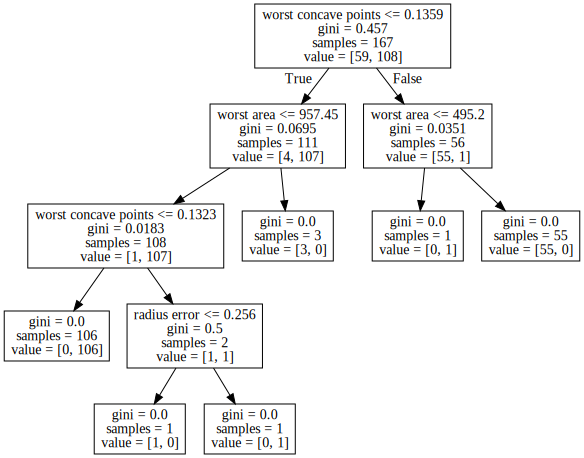

In [86]:
from sklearn.tree import export_graphviz
with open('treeDT.dot', 'w') as dotfile:
    export_graphviz(DTC0, dotfile, feature_names=sub_features)
    
import graphviz
with open("treeDT.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph) 